Source: https://www.youtube.com/watch?v=vB8SleIKlcw [17.12.2021]

Source: https://www.youtube.com/watch?v=WvoLTXIjBYU [17.12.2021]

Source: https://www.youtube.com/watch?v=wQ8BIBpya2k&t [18.12.2021]

Source https://www.youtube.com/watch?v=uqomO_BZ44g&t=8s [19.12.2021]

Source: https://thispointer.com/python-get-list-of-files-in-directory-sorted-by-name/ [20.12.2021]

Source: https://www.youtube.com/watch?v=j-3vuBynnOE&t=889s [20.12.2021]

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import mean_squared_error

from tensorflow.keras.preprocessing.image import ImageDataGenerator

Loading the pictures from Google Drive and resizeing them

In [ ]:
training_data = []
path = 'drive/MyDrive/Bachelorarbeit/Bilder/cs03_64177/'
for img in sorted(os.listdir(path)):
  img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
  img_array = cv2.resize(img_array, (120, 68))
  training_data.append(img_array)

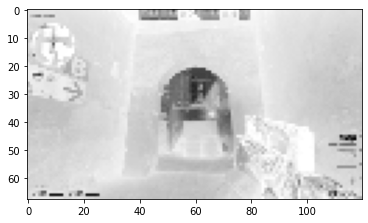

In [ ]:
plt.imshow(training_data[0], cmap = plt.cm.binary)
plt.show()

In [ ]:
print(len(training_data))

3286


Normalize the pictures

In [ ]:
training_data = np.divide(training_data, 255.0)

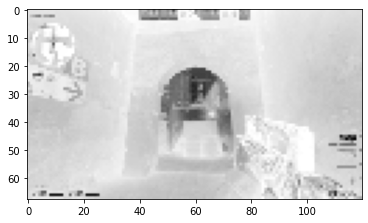

In [ ]:
plt.imshow(training_data[0], cmap = plt.cm.binary)
plt.show()

In [ ]:
training_data.shape

(3286, 68, 120)

Flatten the pictures

In [ ]:
training_data = np.reshape(training_data, (3286, 120*68), 'C')

Create the array with the look back for training

In [ ]:
X_all = []
y_all = []

look_back = 2

for i in range(len(training_data)-look_back-1):
  x = []
  for j in range(look_back):
    x.extend(training_data[i+j])
  X_all.append(x)
  y_all.append(training_data[i+look_back])

X_all, y_all = np.array(X_all), np.array(y_all)

Split the dataset in training and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)

Train the model

In [ ]:
model = Sequential()
model.add(Dense(2500))
model.add(Dense(2000, activation='relu'))
model.add(Dense(3000, activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(120*68, activation='sigmoid'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=32)

Save the model after 20 epochs

In [ ]:
model.save('drive/MyDrive/neural_network_120x68.hdf5')

Compare the original and predicted pictures

In [ ]:
testPredict = model.predict(X_test)
trainPredict = model.predict(X_train)

In [ ]:
test_picture = y_test[30]
test_picture = np.reshape(test_picture, (68, 120))

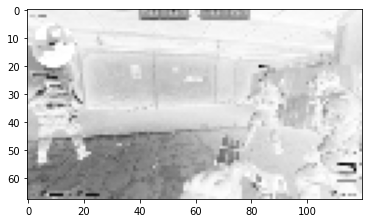

In [ ]:
plt.imshow(test_picture, cmap = plt.cm.binary)
plt.show()

In [ ]:
predicted_picture = testPredict[30]
predicted_picture = np.reshape(predicted_picture, (68, 120))

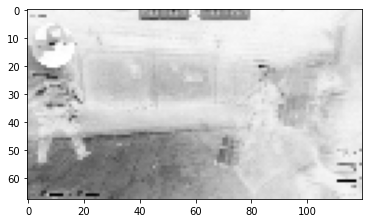

In [ ]:
plt.imshow(predicted_picture, cmap = plt.cm.binary)
plt.show()

Save them as example pictures

In [ ]:
from PIL import Image
test_picture = np.multiply(test_picture, 255.0)
im = Image.fromarray(test_picture)
im = im.convert('L')
im.save('drive/MyDrive/bilder_ba/test_pic_8.png')
predicted_picture = np.multiply(predicted_picture, 255.0)
im = Image.fromarray(predicted_picture)
im = im.convert('L')
im.save('drive/MyDrive/bilder_ba/pre_pic_8.png')

Calculate the error

In [ ]:
import math
trainScore = math.sqrt(mean_squared_error(y_train[:], trainPredict[:]))
print('Train Score: %.4f RMSE' % (trainScore))
trainScore = math.sqrt(mean_squared_error(y_test[:], testPredict[:]))
print('Test Score: %.4f RMSE' % (trainScore))

Train Score: 0.0673 RMSE
Test Score: 0.0764 RMSE


Train Score: 0.0673 RMSE

Test Score: 0.0764 RMSE